In [1]:
import pandas as pd

In [2]:
data = pd.read_pickle("preparedData.pkl")
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56536 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          56536 non-null  datetime64[ns, UTC]
 1   disconnectTime          56536 non-null  datetime64[ns, UTC]
 2   doneChargingTime        56536 non-null  datetime64[ns, UTC]
 3   kWhDelivered            56536 non-null  float64            
 4   siteID                  56536 non-null  int64              
 5   userID                  41309 non-null  float64            
 6   combinedSpaceStationID  56536 non-null  object             
 7   timeConnected           56536 non-null  float64            
 8   idleTime                56536 non-null  float64            
 9   chargingTime            56536 non-null  float64            
 10  weekday                 56536 non-null  int32              
 11  month                   56536 non-null  i

In [4]:
#drop caterorical information
#ids:

In [5]:
# Create a second DataFrame 'data_with_nulls' with rows where either 'userID' or 'kWhDelivered' have null values
unsubscribed_df = data[data['userID'].isnull()]


In [6]:
# Drop the 'userID' and 'kWhDelivered' columns from 'data_with_nulls'
unsubscribed_df = unsubscribed_df.drop(['userID', 'kWhDelivered','kWhRequested','milesRequested','WhPerMile','minutesAvailable','modifiedAt','paymentRequired','requestedDeparture'], axis=1)


In [7]:
unsubscribed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15227 entries, 11 to 56493
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          15227 non-null  datetime64[ns, UTC]
 1   disconnectTime          15227 non-null  datetime64[ns, UTC]
 2   doneChargingTime        15227 non-null  datetime64[ns, UTC]
 3   siteID                  15227 non-null  int64              
 4   combinedSpaceStationID  15227 non-null  object             
 5   timeConnected           15227 non-null  float64            
 6   idleTime                15227 non-null  float64            
 7   chargingTime            15227 non-null  float64            
 8   weekday                 15227 non-null  int32              
 9   month                   15227 non-null  int32              
 10  time                    15227 non-null  object             
dtypes: datetime64[ns, UTC](3), float64(3), int32(

In [8]:
subscribers_df=data.dropna()
subscribers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41309 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          41309 non-null  datetime64[ns, UTC]
 1   disconnectTime          41309 non-null  datetime64[ns, UTC]
 2   doneChargingTime        41309 non-null  datetime64[ns, UTC]
 3   kWhDelivered            41309 non-null  float64            
 4   siteID                  41309 non-null  int64              
 5   userID                  41309 non-null  float64            
 6   combinedSpaceStationID  41309 non-null  object             
 7   timeConnected           41309 non-null  float64            
 8   idleTime                41309 non-null  float64            
 9   chargingTime            41309 non-null  float64            
 10  weekday                 41309 non-null  int32              
 11  month                   41309 non-null  int32 

In [9]:
data_withoutNull=subscribers_df.copy()
data_withoutNull

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [10]:
# read in weather data

weather = pd.read_csv("weather_burbank_airport.csv")
weather

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [11]:
#drop caterotical and unnecessary columns
data_withoutNull=data_withoutNull.drop(['siteID', 'userID', 'paymentRequired', 'requestedDeparture', 'modifiedAt','combinedSpaceStationID'], axis=1)

In [12]:
weather = weather.drop(['city', 'cloud_cover', 'cloud_cover_description', 'pressure', 'windspeed', 'felt_temperature'], axis=1)
weather

,timestamp,temperature,precipitation
0,2018-01-01 08:53:00,9.0,0.0
1,2018-01-01 09:53:00,9.0,0.0
2,2018-01-01 10:53:00,9.0,0.0
3,2018-01-01 11:53:00,9.0,0.0
4,2018-01-01 12:53:00,8.0,0.0
...,...,...,...
29239,2021-01-01 03:53:00,13.0,0.0
29240,2021-01-01 04:53:00,12.0,0.0
29241,2021-01-01 05:53:00,12.0,0.0
29242,2021-01-01 06:53:00,11.0,0.0


In [13]:
#convert timestamp attribute into datetime type and drop old timestamp attribute

weather["dateTime"] = pd.to_datetime(weather['timestamp'])
weather = weather.drop(['timestamp'], axis=1)
weather

,temperature,precipitation,dateTime
0,9.0,0.0,2018-01-01 08:53:00
1,9.0,0.0,2018-01-01 09:53:00
2,9.0,0.0,2018-01-01 10:53:00
3,9.0,0.0,2018-01-01 11:53:00
4,8.0,0.0,2018-01-01 12:53:00
...,...,...,...
29239,13.0,0.0,2021-01-01 03:53:00
29240,12.0,0.0,2021-01-01 04:53:00
29241,12.0,0.0,2021-01-01 05:53:00
29242,11.0,0.0,2021-01-01 06:53:00


In [14]:
data_withoutNull['connectionTime'] = data_withoutNull['connectionTime'].dt.tz_localize(None)
data_withoutNull

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable
0,2020-01-02 13:08:54,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0
1,2020-01-02 13:36:50,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0
2,2020-01-02 13:56:35,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0
3,2020-01-02 13:59:58,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0
4,2020-01-02 14:00:01,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0
56532,2019-07-01 19:43:46,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0
56533,2019-07-01 20:34:30,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0
56534,2019-07-01 21:49:12,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0


In [15]:
# drop minutes and seconds of both datetime attributes

data_withoutNull['connectionTime_rounded'] = data_withoutNull['connectionTime'].dt.strftime('%Y-%m-%d %H:00:00')
weather['dateTime'] = weather['dateTime'].dt.strftime('%Y-%m-%d %H:00:00')

In [16]:
data_withoutNull

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,connectionTime_rounded
0,2020-01-02 13:08:54,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,2020-01-02 13:00:00
1,2020-01-02 13:36:50,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,2020-01-02 13:00:00
2,2020-01-02 13:56:35,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,2020-01-02 13:00:00
3,2020-01-02 13:59:58,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,2020-01-02 13:00:00
4,2020-01-02 14:00:01,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,2020-01-02 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,2019-07-01 19:00:00
56532,2019-07-01 19:43:46,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,2019-07-01 19:00:00
56533,2019-07-01 20:34:30,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,2019-07-01 20:00:00
56534,2019-07-01 21:49:12,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,2019-07-01 21:00:00


In [17]:
# drop duplicates in weather to ensure correct merge of both dataframes 

weather.drop_duplicates(subset='dateTime', inplace=True)

In [18]:
import holidays
from datetime import timedelta, date

us_ca_holidays = holidays.country_holidays(country='US', subdiv='CA')

data_withoutNull["holiday"] = data_withoutNull["connectionTime"].apply(lambda x: int(x in us_ca_holidays))

In [19]:
# combine both df into a single one along the dateTime and connectionTime attribute

mergedData = pd.merge(data_withoutNull, weather, left_on='connectionTime_rounded', right_on='dateTime', how="left")
mergedData

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,connectionTime_rounded,holiday,temperature,precipitation,dateTime
0,2020-01-02 13:08:54,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
1,2020-01-02 13:36:50,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
2,2020-01-02 13:56:35,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
3,2020-01-02 13:59:58,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
4,2020-01-02 14:00:01,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,2020-01-02 14:00:00,0,14.0,0.0,2020-01-02 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41304,2019-07-01 19:13:11,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,2019-07-01 19:00:00,0,29.0,0.0,2019-07-01 19:00:00
41305,2019-07-01 19:43:46,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,2019-07-01 19:00:00,0,29.0,0.0,2019-07-01 19:00:00
41306,2019-07-01 20:34:30,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,2019-07-01 20:00:00,0,30.0,0.0,2019-07-01 20:00:00
41307,2019-07-01 21:49:12,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,2019-07-01 21:00:00,0,31.0,0.0,2019-07-01 21:00:00


In [20]:
mergedData.isna().sum()

connectionTime               0
disconnectTime               0
doneChargingTime             0
kWhDelivered                 0
timeConnected                0
idleTime                     0
chargingTime                 0
weekday                      0
month                        0
time                         0
WhPerMile                    0
kWhRequested                 0
milesRequested               0
minutesAvailable             0
connectionTime_rounded       0
holiday                      0
temperature               7074
precipitation             7069
dateTime                  7069
dtype: int64

In [21]:
# drop all rows where we don't have entries in the weather attributes

cleanedData = mergedData.dropna(subset=['temperature','precipitation','dateTime'])
cleanedData

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,connectionTime_rounded,holiday,temperature,precipitation,dateTime
0,2020-01-02 13:08:54,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
1,2020-01-02 13:36:50,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
2,2020-01-02 13:56:35,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
3,2020-01-02 13:59:58,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
4,2020-01-02 14:00:01,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,2020-01-02 14:00:00,0,14.0,0.0,2020-01-02 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41304,2019-07-01 19:13:11,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,2019-07-01 19:00:00,0,29.0,0.0,2019-07-01 19:00:00
41305,2019-07-01 19:43:46,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,2019-07-01 19:00:00,0,29.0,0.0,2019-07-01 19:00:00
41306,2019-07-01 20:34:30,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,2019-07-01 20:00:00,0,30.0,0.0,2019-07-01 20:00:00
41307,2019-07-01 21:49:12,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,2019-07-01 21:00:00,0,31.0,0.0,2019-07-01 21:00:00


In [22]:
cleanedData.drop(['time'],axis=1)

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,connectionTime_rounded,holiday,temperature,precipitation,dateTime
0,2020-01-02 13:08:54,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,21741.0,5980.0,15761.0,3,1,250.0,25.00,100.0,463.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
1,2020-01-02 13:36:50,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,32491.0,8416.0,24075.0,3,1,280.0,70.00,250.0,595.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
2,2020-01-02 13:56:35,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,38567.0,29056.0,9511.0,3,1,400.0,8.00,20.0,60.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
3,2020-01-02 13:59:58,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,9521.0,4794.0,4727.0,3,1,400.0,8.00,20.0,65.0,2020-01-02 13:00:00,0,13.0,0.0,2020-01-02 13:00:00
4,2020-01-02 14:00:01,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,29319.0,13870.0,15449.0,3,1,400.0,16.00,40.0,504.0,2020-01-02 14:00:00,0,14.0,0.0,2020-01-02 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41304,2019-07-01 19:13:11,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,19889.0,12644.0,7245.0,0,7,275.0,8.25,30.0,374.0,2019-07-01 19:00:00,0,29.0,0.0,2019-07-01 19:00:00
41305,2019-07-01 19:43:46,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,26107.0,900.0,25207.0,0,7,231.0,36.96,160.0,310.0,2019-07-01 19:00:00,0,29.0,0.0,2019-07-01 19:00:00
41306,2019-07-01 20:34:30,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,14182.0,10988.0,3194.0,0,7,300.0,12.00,40.0,381.0,2019-07-01 20:00:00,0,30.0,0.0,2019-07-01 20:00:00
41307,2019-07-01 21:49:12,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,13686.0,8565.0,5121.0,0,7,400.0,32.00,80.0,36.0,2019-07-01 21:00:00,0,31.0,0.0,2019-07-01 21:00:00


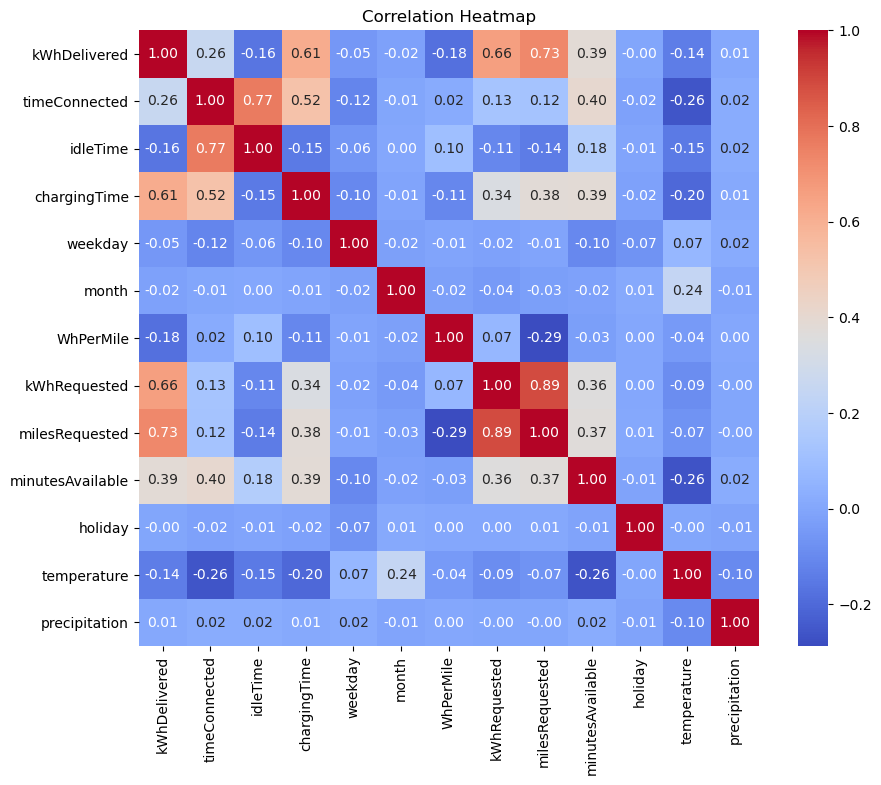

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate or load your DataFrame 'data' here

# Remove non-numeric columns from the DataFrame
numeric_data = cleanedData.select_dtypes(include=[np.number])
numeric_data.describe()
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


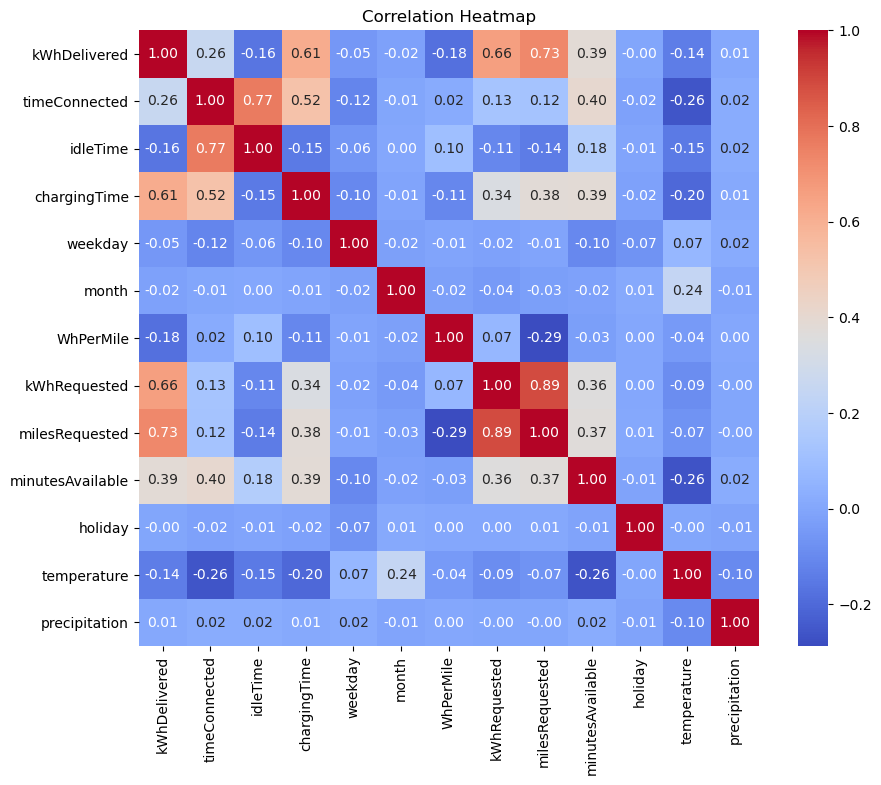

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate or load your DataFrame 'data' here

# Remove non-numeric columns from the DataFrame
numeric_data = cleanedData.select_dtypes(include=[np.number])
numeric_data.describe()
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


In [25]:
correlation_matrix

,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,holiday,temperature,precipitation
kWhDelivered,1.000000,0.258465,-0.162349,0.613325,-0.050896,-0.020541,-0.179328,0.658430,0.731202,0.386137,-0.000832,-0.138043,0.009282
timeConnected,0.258465,1.000000,0.766328,0.523187,-0.115370,-0.005386,0.019522,0.125983,0.123984,0.404617,-0.018023,-0.260047,0.023395
idleTime,-0.162349,0.766328,1.000000,-0.146574,-0.056138,0.001103,0.104719,-0.108877,-0.142803,0.178261,-0.008908,-0.147707,0.019864
chargingTime,0.613325,0.523187,-0.146574,1.000000,-0.103172,-0.009756,-0.108854,0.338406,0.380333,0.386536,-0.015933,-0.204468,0.009671
weekday,-0.050896,-0.115370,-0.056138,-0.103172,1.000000,-0.024852,-0.008967,-0.015856,-0.008452,-0.104310,-0.070576,0.067998,0.018185
month,-0.020541,-0.005386,0.001103,-0.009756,-0.024852,1.000000,-0.022511,-0.043171,-0.029216,-0.017141,0.011076,0.242827,-0.005828
WhPerMile,-0.179328,0.019522,0.104719,-0.108854,-0.008967,-0.022511,1.000000,0.069464,-0.287130,-0.029100,0.000250,-0.042358,0.001061
kWhRequested,0.658430,0.125983,-0.108877,0.338406,-0.015856,-0.043171,0.069464,1.000000,0.888859,0.361188,0.003822,-0.089540,-0.003610
milesRequested,0.731202,0.123984,-0.142803,0.380333,-0.008452,-0.029216,-0.287130,0.888859,1.000000,0.369400,0.005719,-0.069153,-0.002874
minutesAvailable,0.386137,0.404617,0.178261,0.386536,-0.104310,-0.017141,-0.029100,0.361188,0.369400,1.000000,-0.014455,-0.263611,0.020430


In [26]:
#drop high correlated features
import pandas as pd
import numpy as np

# Generate or load your DataFrame 'data' here

# Remove non-numeric columns from the DataFrame
numeric_data = cleanedData.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Define a threshold for correlation
threshold = 0.8  # Adjust this threshold as needed

# Find pairs of highly correlated features
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > threshold)

# Create a set to keep track of columns to drop
columns_to_drop = set()

# Iterate through the pairs of highly correlated features and decide which ones to drop
for i, j in zip(*highly_correlated_pairs):
    if i != j:
        feature_i = numeric_data.columns[i]
        feature_j = numeric_data.columns[j]
        # Drop one of the features based on your choice
        # You can add your logic here to decide which feature to drop
        # For example, you can drop the one with lower importance in your analysis
        columns_to_drop.add(feature_i)  # Drop feature_i
        # columns_to_drop.add(feature_j)  # Or drop feature_j if you prefer

# Drop the highly correlated columns from the DataFrame
cleanedData.drop(columns=columns_to_drop, inplace=True)

# Now, your DataFrame 'data' should have the highly correlated features removed.


<ipython-input-26-c702e3ee1a69>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData.drop(columns=columns_to_drop, inplace=True)


In [27]:
correlation_matrix

,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,holiday,temperature,precipitation
kWhDelivered,1.000000,0.258465,-0.162349,0.613325,-0.050896,-0.020541,-0.179328,0.658430,0.731202,0.386137,-0.000832,-0.138043,0.009282
timeConnected,0.258465,1.000000,0.766328,0.523187,-0.115370,-0.005386,0.019522,0.125983,0.123984,0.404617,-0.018023,-0.260047,0.023395
idleTime,-0.162349,0.766328,1.000000,-0.146574,-0.056138,0.001103,0.104719,-0.108877,-0.142803,0.178261,-0.008908,-0.147707,0.019864
chargingTime,0.613325,0.523187,-0.146574,1.000000,-0.103172,-0.009756,-0.108854,0.338406,0.380333,0.386536,-0.015933,-0.204468,0.009671
weekday,-0.050896,-0.115370,-0.056138,-0.103172,1.000000,-0.024852,-0.008967,-0.015856,-0.008452,-0.104310,-0.070576,0.067998,0.018185
month,-0.020541,-0.005386,0.001103,-0.009756,-0.024852,1.000000,-0.022511,-0.043171,-0.029216,-0.017141,0.011076,0.242827,-0.005828
WhPerMile,-0.179328,0.019522,0.104719,-0.108854,-0.008967,-0.022511,1.000000,0.069464,-0.287130,-0.029100,0.000250,-0.042358,0.001061
kWhRequested,0.658430,0.125983,-0.108877,0.338406,-0.015856,-0.043171,0.069464,1.000000,0.888859,0.361188,0.003822,-0.089540,-0.003610
milesRequested,0.731202,0.123984,-0.142803,0.380333,-0.008452,-0.029216,-0.287130,0.888859,1.000000,0.369400,0.005719,-0.069153,-0.002874
minutesAvailable,0.386137,0.404617,0.178261,0.386536,-0.104310,-0.017141,-0.029100,0.361188,0.369400,1.000000,-0.014455,-0.263611,0.020430


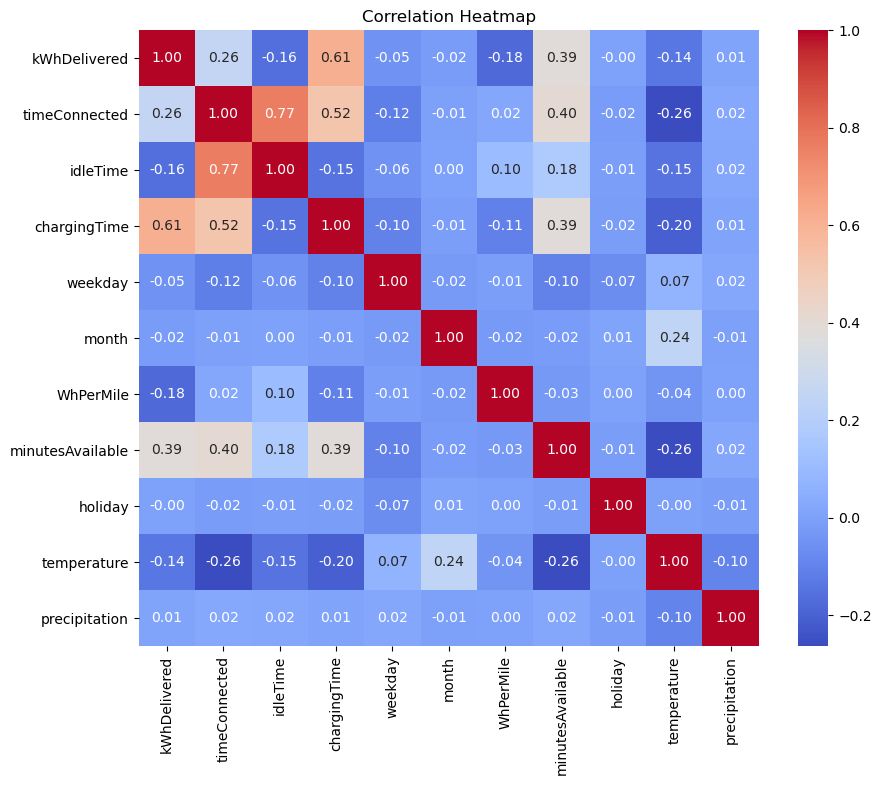

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns from the DataFrame
numeric_data = cleanedData.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [30]:
#holiday is still catericak so lets drop it maybe we could use it later
numeric_data_with_holiday=numeric_data.copy()
numeric_data=numeric_data.drop(['holiday'], axis=1)

In [31]:
#Which are the groups with the charging time, idle times, time connected,
#groups during the holiday, weekday
#groups with high tempretaures and percipation
numeric_data

,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,minutesAvailable,temperature,precipitation
0,25.016,21741.0,5980.0,15761.0,3,1,250.0,463.0,13.0,0.0
1,33.097,32491.0,8416.0,24075.0,3,1,280.0,595.0,13.0,0.0
2,6.521,38567.0,29056.0,9511.0,3,1,400.0,60.0,13.0,0.0
3,2.355,9521.0,4794.0,4727.0,3,1,400.0,65.0,13.0,0.0
4,13.375,29319.0,13870.0,15449.0,3,1,400.0,504.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41304,6.048,19889.0,12644.0,7245.0,0,7,275.0,374.0,29.0,0.0
41305,41.047,26107.0,900.0,25207.0,0,7,231.0,310.0,29.0,0.0
41306,5.390,14182.0,10988.0,3194.0,0,7,300.0,381.0,30.0,0.0
41307,8.399,13686.0,8565.0,5121.0,0,7,400.0,36.0,31.0,0.0


### The df we are now using is the merged cleaned dataset with only numerical data: **numeric_data**

**First let's normalize**

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_data)
numeric_data_scaled = scaler.transform(numeric_data)
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns, index=numeric_data.index)
numeric_data_scaled_df.head()

,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,minutesAvailable,temperature,precipitation
0,1.114665,-0.257788,-0.482343,0.242909,0.538917,-1.434841,-1.253203,0.584032,-0.556323,-0.116631
1,1.873171,0.447650,-0.296793,1.082960,0.538917,-1.434841,-0.944489,1.283729,-0.556323,-0.116631
2,-0.621330,0.846370,1.275355,-0.388594,0.538917,-1.434841,0.290365,-1.552164,-0.556323,-0.116631
3,-1.012362,-1.059691,-0.572680,-0.871972,0.538917,-1.434841,0.290365,-1.525660,-0.556323,-0.116631
4,0.022007,0.239496,0.118638,0.211384,0.538917,-1.434841,0.290365,0.801362,-0.391750,-0.116631


In [34]:
correlation_matrix

,kWhDelivered,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,minutesAvailable,holiday,temperature,precipitation
kWhDelivered,1.000000,0.258465,-0.162349,0.613325,-0.050896,-0.020541,-0.179328,0.386137,-0.000832,-0.138043,0.009282
timeConnected,0.258465,1.000000,0.766328,0.523187,-0.115370,-0.005386,0.019522,0.404617,-0.018023,-0.260047,0.023395
idleTime,-0.162349,0.766328,1.000000,-0.146574,-0.056138,0.001103,0.104719,0.178261,-0.008908,-0.147707,0.019864
chargingTime,0.613325,0.523187,-0.146574,1.000000,-0.103172,-0.009756,-0.108854,0.386536,-0.015933,-0.204468,0.009671
weekday,-0.050896,-0.115370,-0.056138,-0.103172,1.000000,-0.024852,-0.008967,-0.104310,-0.070576,0.067998,0.018185
month,-0.020541,-0.005386,0.001103,-0.009756,-0.024852,1.000000,-0.022511,-0.017141,0.011076,0.242827,-0.005828
WhPerMile,-0.179328,0.019522,0.104719,-0.108854,-0.008967,-0.022511,1.000000,-0.029100,0.000250,-0.042358,0.001061
minutesAvailable,0.386137,0.404617,0.178261,0.386536,-0.104310,-0.017141,-0.029100,1.000000,-0.014455,-0.263611,0.020430
holiday,-0.000832,-0.018023,-0.008908,-0.015933,-0.070576,0.011076,0.000250,-0.014455,1.000000,-0.003193,-0.014114
temperature,-0.138043,-0.260047,-0.147707,-0.204468,0.067998,0.242827,-0.042358,-0.263611,-0.003193,1.000000,-0.096407


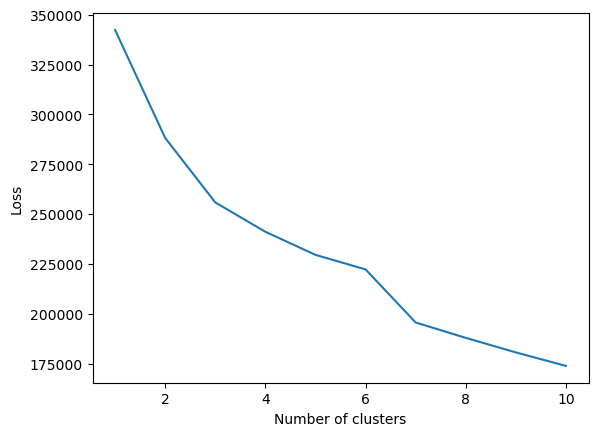

In [36]:
from sklearn.cluster import KMeans
k_max = 10
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(numeric_data_scaled_df)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

**7 LOOKS GOOD**

**pairplot charging**
### l#########################################################################

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with your features
selected_features = ['kWhDelivered', 'chargingTime', 'weekday', 'month', 'WhPerMile', 'minutesAvailable']
data_selected = data[selected_features]

# Remove rows with missing values
data_cleaned = data_selected.dropna()

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the cleaned DataFrame 'data_cleaned'
data_cleaned['Cluster_Labels'] = cluster_labels

# Visualize the clustering results using PCA for dimensionality reduction (2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with your features
selected_features = ['kWhDelivered', 'chargingTime', 'weekday', 'month', 'WhPerMile', 'minutesAvailable']
data_selected = data[selected_features]

# Remove rows with missing values
data_cleaned = data_selected.dropna()

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the cleaned DataFrame 'data_cleaned'
data_cleaned['Cluster_Labels'] = cluster_labels

# Visualize the clustering results using PCA for dimensionality reduction (2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced_X = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
correlation__matrix

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate or load your DataFrame 'data' here

# Filter the DataFrame to keep only numeric columns
numeric_data = data_withoutNull.select_dtypes(include=[np.number])

# Impute missing values (you can customize the strategy)
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Perform feature scaling (optional but recommended for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to your DataFrame
data['Cluster_Labels'] = cluster_labels

# Visualize the clustering results (for 2D data, you can choose two features to plot)
# Here, we'll assume you have a 2D DataFrame (replace 'feature1' and 'feature2' with actual feature names)
feature1 = 'Feature1'
feature2 = 'Feature2'

plt.figure(figsize=(10, 6))
plt.scatter(data_withoutNull[feature1], data_withoutNull[feature2], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with your features
X=data_withoutNull

# Perform feature scaling (optional but recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to your original DataFrame 'data'
data['Cluster_Labels'] = cluster_labels

# Visualize the clustering results using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
